# Random Search Algorithms

### Importing Necessary Libraries


In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import numpy as np
import pandas as pd
import seaborn as sns
import mlrose_hiive
import matplotlib.pyplot as plt
np.random.seed(44)
sns.set_style("darkgrid")

### Defining FlipFlop Problems Parameters

In [2]:
%%time
flip_len=500
problem = mlrose_hiive.FlipFlopOpt(length=flip_len)

CPU times: user 1.79 ms, sys: 69 µs, total: 1.86 ms
Wall time: 1.85 ms


### Optimization #1 MIMIC

#### Run MIMIC on FlipFlop problem

In [10]:
%%time
mmc = mlrose_hiive.MIMICRunner(problem=problem,
                          experiment_name="MMC_Exp",
                          seed=44,
                          iteration_list=[10000],
                          max_attempts=100,
                          population_sizes=[100,500],
                          keep_percent_list=[0.1, 0.25, 0.5],
                          use_fast_mimic=True)

# the two data frames will contain the results
mmc_run_stats, mmc_run_curves = mmc.run()

CPU times: user 18min 21s, sys: 5min 14s, total: 23min 35s
Wall time: 23min 37s


#### Output Fitnes Value Statists

In [11]:
last_iters = mmc_run_stats[mmc_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Keep Percent").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())
mmc_run_curves

Max and mean
439.0 386.5 236.19012734600003
Keep Percent
0.10    359.0
0.25    397.0
0.50    403.5
Name: Fitness, dtype: float64
Population Size
100    347.666667
500    425.333333
Name: Fitness, dtype: float64
Population Size
100     93.213635
500    379.166619
Name: Time, dtype: float64


,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.004455,257.0,0.0,True,100,0.1,10000
1,1,0.276119,281.0,2.0,True,100,0.1,10000
2,2,0.512900,305.0,4.0,True,100,0.1,10000
3,3,0.761498,305.0,5.0,True,100,0.1,10000
4,4,1.012239,307.0,7.0,True,100,0.1,10000
...,...,...,...,...,...,...,...,...
844,162,31.646094,432.0,200.0,True,500,0.5,10000
845,163,32.333605,432.0,201.0,True,500,0.5,10000
846,164,33.032242,432.0,202.0,True,500,0.5,10000
847,165,33.734687,432.0,203.0,True,500,0.5,10000


#### Plot Fitness to Iterations Chart

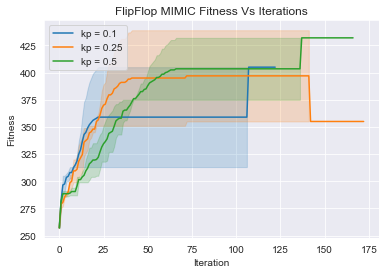

In [12]:
# draw lineplot 
mmc_run_curves_kp1 = mmc_run_curves[mmc_run_curves['Keep Percent'] == 0.1] 
mmc_run_curves_kp2 = mmc_run_curves[mmc_run_curves['Keep Percent'] == 0.25] 
mmc_run_curves_kp3 = mmc_run_curves[mmc_run_curves['Keep Percent'] == 0.5] 
sns.lineplot(x="Iteration", y="Fitness", data=mmc_run_curves_kp1, label = "kp = 0.1") 
sns.lineplot(x="Iteration", y="Fitness", data=mmc_run_curves_kp2, label = "kp = 0.25") 
sns.lineplot(x="Iteration", y="Fitness", data=mmc_run_curves_kp3, label = "kp = 0.5") 
plt.title('FlipFlop MIMIC Fitness Vs Iterations')
plt.show()


### Optimization #2 Simulated Annealing

#### Run SA on FlipFlop problem

In [7]:
%%time
sa = mlrose_hiive.SARunner(problem, experiment_name="SA_Exp", 
                           iteration_list=[10000],
                           temperature_list=[10, 50, 100, 250, 500],
                           decay_list=[mlrose_hiive.ExpDecay,
                                       mlrose_hiive.GeomDecay],
                           seed=44, max_attempts=100)

sa_run_stats, sa_run_curves = sa.run()

CPU times: user 8min 37s, sys: 1.35 s, total: 8min 38s
Wall time: 8min 39s


#### Output Fitnes Value Statists

In [8]:
last_iters = sa_run_stats[sa_run_stats.Iteration != 0].reset_index()
print('Mean:', last_iters.Fitness.mean(), '\nMin:',last_iters.Fitness.max(),'\nMax:',last_iters.Fitness.max())
print('Mean Time;',last_iters.Time.mean())

Mean: 474.0 
Min: 483.0 
Max: 483.0
Mean Time; 51.890187047899985


#### Plot Fitness to Iterations Chart

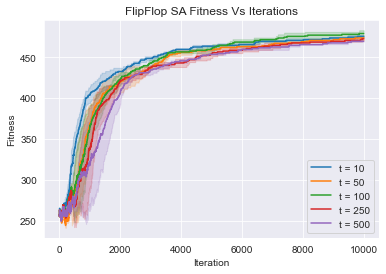

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.002288,257.0,0.0,10.0,10000
1,1,0.008063,257.0,2.0,10.0,10000
2,2,0.010925,257.0,4.0,10.0,10000
3,3,0.013717,257.0,6.0,10.0,10000
4,4,0.015906,257.0,8.0,10.0,10000
...,...,...,...,...,...,...
100005,9996,50.540533,470.0,12514.0,500.0,10000
100006,9997,50.548736,470.0,12515.0,500.0,10000
100007,9998,50.557901,470.0,12516.0,500.0,10000
100008,9999,50.567092,470.0,12517.0,500.0,10000


In [9]:
best_index_in_curve = sa_run_curves.Fitness.idxmax()
best_decay = sa_run_curves.iloc[best_index_in_curve].Temperature
best_sa_curve = sa_run_curves.loc[sa_run_curves.Temperature == best_decay, :]
best_sa_curve.reset_index(inplace=True)


# draw lineplot 
sa_run_curves['Temperature'] = sa_run_curves['Temperature'].astype(str).astype(float)
sa_run_curves_t1 = sa_run_curves[sa_run_curves['Temperature'] == 10] 
sa_run_curves_t2 = sa_run_curves[sa_run_curves['Temperature'] == 50] 
sa_run_curves_t3 = sa_run_curves[sa_run_curves['Temperature'] == 100]
sa_run_curves_t4 = sa_run_curves[sa_run_curves['Temperature'] == 250] 
sa_run_curves_t5 = sa_run_curves[sa_run_curves['Temperature'] == 500] 
sns.lineplot(x="Iteration", y="Fitness", data=sa_run_curves_t1, label = "t = 10")
sns.lineplot(x="Iteration", y="Fitness", data=sa_run_curves_t2, label = "t = 50") 
sns.lineplot(x="Iteration", y="Fitness", data=sa_run_curves_t3, label = "t = 100") 
sns.lineplot(x="Iteration", y="Fitness", data=sa_run_curves_t4, label = "t = 250") 
sns.lineplot(x="Iteration", y="Fitness", data=sa_run_curves_t5, label = "t = 500") 
 
plt.title('FlipFlop SA Fitness Vs Iterations')
plt.show()

# # draw lineplot 
# sns.lineplot(x="Iteration", y="Fitness", data=best_sa_curve) 
# plt.title('FlipFlop SA Fitness Vs Iterations')
# plt.show()
sa_run_curves

### Optimization #3 Genetic Algorithm

#### Run GA on FlipFlop problem

In [3]:
%%time
ga = mlrose_hiive.GARunner(problem=problem,
                          experiment_name="GA_Exp",
                          seed=44,
                          iteration_list = [10000],
                          max_attempts = 100,
                          population_sizes = [100, 500],
                          mutation_rates = [0.1, 0.25, 0.5])

ga_run_stats, ga_run_curves = ga.run()

CPU times: user 1min 2s, sys: 147 ms, total: 1min 2s
Wall time: 1min 2s


#### Output Fitnes Value Statists

In [5]:
last_iters = ga_run_stats[ga_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Mutation Rate").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())

Max and mean
454.0 434.3333333333333 10.470489879
Mutation Rate
0.10    435.0
0.25    427.0
0.50    441.0
Name: Fitness, dtype: float64
Population Size
100    422.000000
500    446.666667
Name: Fitness, dtype: float64
Population Size
100     5.164936
500    15.776043
Name: Time, dtype: float64


#### Plot Fitness to Iterations Chart

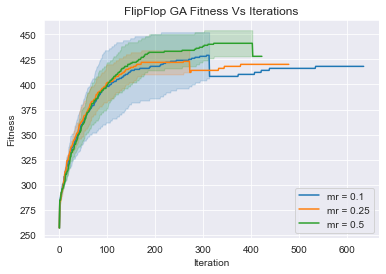

In [6]:
# draw lineplot 
ga_run_curves_mu1 = ga_run_curves[ga_run_curves['Mutation Rate'] == 0.1] 
ga_run_curves_mu2 = ga_run_curves[ga_run_curves['Mutation Rate'] == 0.25] 
ga_run_curves_mu3 = ga_run_curves[ga_run_curves['Mutation Rate'] == 0.5] 
sns.lineplot(x="Iteration", y="Fitness", data=ga_run_curves_mu1, label = "mr = 0.1") 
sns.lineplot(x="Iteration", y="Fitness", data=ga_run_curves_mu2, label = "mr = 0.25") 
sns.lineplot(x="Iteration", y="Fitness", data=ga_run_curves_mu3, label = "mr = 0.5") 
plt.title('FlipFlop GA Fitness Vs Iterations')
plt.show()

### Optimization #4 Randomized Hill Climbing


#### Run RHC on FlipFlop problem

In [13]:
%%time
runner_return = mlrose_hiive.RHCRunner(problem, experiment_name="first_try", 
                                       iteration_list=[10000],
                                       seed=44, max_attempts=100, 
                                       restart_list=[100])
rhc_run_stats, rhc_run_curves = runner_return.run()

CPU times: user 1h 36min 23s, sys: 6.72 s, total: 1h 36min 30s
Wall time: 2h 52min 32s


#### Output Fitnes Value Statists

In [14]:
last_iters = rhc_run_stats[rhc_run_stats.Iteration != 0].reset_index()
print(last_iters.Fitness.mean(), last_iters.Fitness.max())
print(last_iters.Time.max())

392.0 414.0
5817.890918854


#### Plot Fitness to Iterations Chart

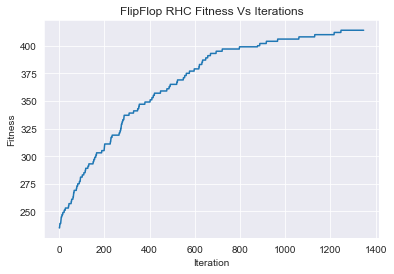

In [15]:
best_index_in_curve = rhc_run_curves.Fitness.idxmax()
best_decay = rhc_run_curves.iloc[best_index_in_curve].current_restart
best_RHC_curve = rhc_run_curves.loc[rhc_run_curves.current_restart == best_decay, :]
best_RHC_curve.reset_index(inplace=True)
best_RHC_curve
# draw lineplot 
sns.lineplot(x="Iteration", y="Fitness", data=best_RHC_curve) 
plt.title('FlipFlop RHC Fitness Vs Iterations')
plt.show()

### Combine Best Fitnesss Curves from Each Algorithm for Comparison

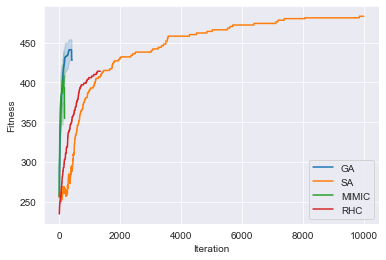

In [16]:
sns.lineplot(x="Iteration", y="Fitness", data=ga_run_curves_mu3, label = "GA") 
sns.lineplot(x="Iteration", y="Fitness", data=best_sa_curve, label = "SA") 
sns.lineplot(x="Iteration", y="Fitness", data=mmc_run_curves, label = "MIMIC") 
sns.lineplot(x="Iteration", y="Fitness", data=best_RHC_curve, label = "RHC") 
plt.show()